In [126]:
test_cities = ["Bagdad_2015", "Tikrit_2015", "Samawah_2015", "Kirkouk_2015"]

In [144]:
import numpy as np
import rasterio as rio
from pathlib import Path

root = Path("../input/test")

for c in test_cities:
    
    p = root / c
    
    origins = []
    px_sizes = []
    for d in p.iterdir():
        for im_path in d.iterdir():
            ds = rio.open(im_path)
            t = ds.get_transform()
            origins.append((t[0], t[3]))
            px_sizes.append((t[1], t[-1]))
            ds = None
            break
    
    print(c, origins, px_sizes)
    origins = np.array(origins)
    px_sizes = np.abs(np.array(px_sizes).mean(axis=0))
    mean_origin = origins.mean(axis=0)
    assert np.all(np.abs(origins - mean_origin) < px_sizes), "{}: {} vs {}".format(c, np.abs(origins - mean_origin), px_sizes)
    

Bagdad_2015 [(407090.0, 3699690.0), (407092.1588978044, 3699689.9713875013), (407090.0, 3699690.0), (407090.0, 3699690.0)] [(10.0, -10.0), (10.002737837565126, -10.002737837565126), (10.0, -10.0), (10.0, -10.0)]
Tikrit_2015 [(300000.0, 3900000.0), (300000.0, 3900000.0), (300000.0, 3900000.0), (300000.0, 3900000.0)] [(10.0, -10.0), (10.0, -10.0), (10.0, -10.0), (10.0, -10.0)]
Samawah_2015 [(499980.0, 3500040.0), (499980.0, 3500040.0), (499980.0, 3500040.0), (499980.0, 3500040.0)] [(10.0, -10.0), (10.0, -10.0), (10.0, -10.0), (10.0, -10.0)]
Kirkouk_2015 [(399960.0, 4000020.0), (399960.0, 4000020.0), (399960.0, 4000020.0), (399960.0, 4000020.0)] [(10.0, -10.0), (10.0, -10.0), (10.0, -10.0), (10.0, -10.0)]


Check geo extensions of test images

In [107]:
!gdalinfo ../input/test/Bagdad_2015/20150114_38SMB/s1a_38SMB_vh_ASC_20150114.tif

Driver: GTiff/GeoTIFF
Files: ../input/test/Bagdad_2015/20150114_38SMB/s1a_38SMB_vh_ASC_20150114.tif
Size is 10190, 10526
Coordinate System is:
PROJCS["WGS 84 / UTM zone 38N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",45],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32638"]]
Origin = (407092.158897804387379,3699689.971387501340359)
Pixel Size = (10.002737837565126

In [125]:
!gdalinfo ../input/test/Bagdad_2015/20151005_38SMB/s1a_38SMB_vh_ASC_20151005.tif

Driver: GTiff/GeoTIFF
Files: ../input/test/Bagdad_2015/20151005_38SMB/s1a_38SMB_vh_ASC_20151005.tif
Size is 10193, 10529
Coordinate System is:
PROJCS["WGS 84 / UTM zone 38N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",45],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32638"]]
Origin = (407090.000000000000000,3699690.000000000000000)
Pixel Size = (10.000000000000000

In [110]:
p1 = "../input/test_tiles/images/s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_2048_4096.tif"
p2 = "../input/test_tiles/images/s1a_38RNV_3b_ASC_20150713t145847_tiles/tile_2048_4096.tif"

In [112]:
import sys
sys.path.insert(0, "../code")

In [114]:
from dataflow.io_utils import read_image
from dataflow.vis import render_image

In [115]:
img1 = read_image(p1)
img2 = read_image(p2)

In [117]:
import matplotlib.pylab as plt
%matplotlib inline

In [118]:
rimg1 = render_image(img1)
rimg2 = render_image(img2)

In [120]:
import numpy as np

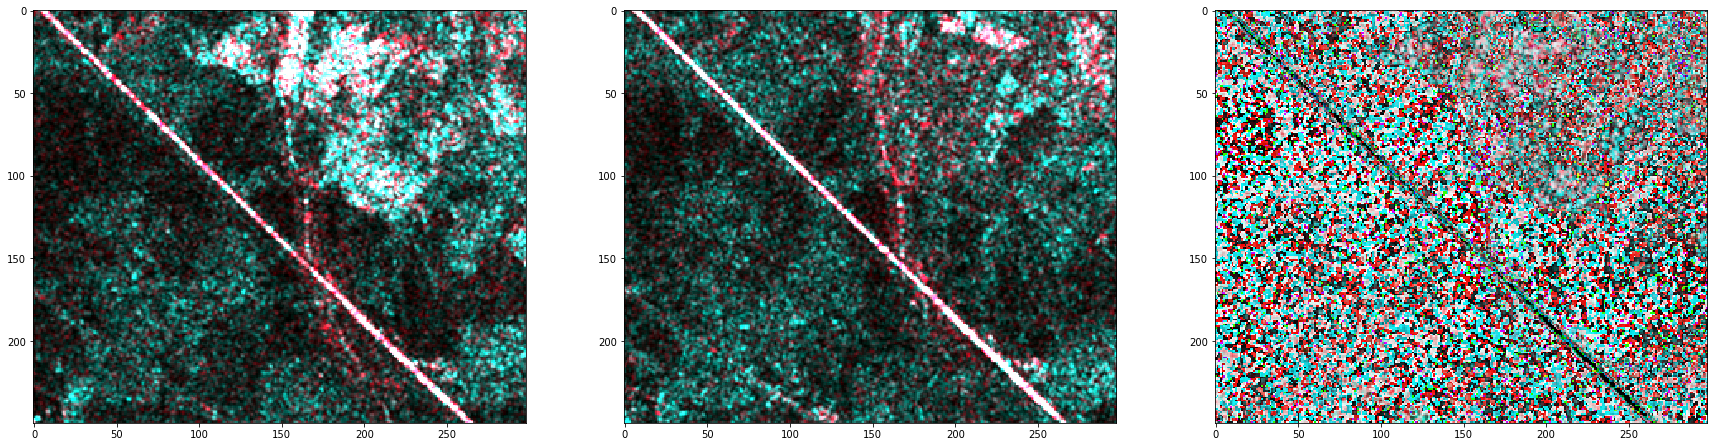

In [123]:
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(rimg1[:250, 1750:, :])
plt.subplot(132)
plt.imshow(rimg2[:250, 1750:, :])
plt.subplot(133)
plt.imshow(np.abs(rimg1 - rimg2)[:250, 1750:, :])

In [1]:
!gdal_polygonize.py


gdal_polygonize [-8] [-nomask] [-mask filename] raster_file [-b band|mask]
                [-q] [-f ogr_format] out_file [layer] [fieldname]



In [2]:
import rasterio as rio

In [3]:
fp = "../input/test_tiles/images/s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_0_0.tif"

In [4]:
out_fp = "test.tif"

In [6]:
import numpy as np


with rio.open(fp, 'r') as src:

    predictions = np.zeros((src.height, src.width), dtype='uint8')

    predictions[10:30, 20:40] = 1
    predictions[50:80, 40:60] = 1

    profile = src.profile
    profile.update(dtype=rio.uint8, count=1)

    with rio.open(out_fp, 'w', **profile) as dst:
        dst.write(predictions.astype(rio.uint8), 1)

In [7]:
!gdal_polygonize.py test.tif test.shp

Creating output test.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [9]:
!ogrinfo test.shp

INFO: Open of `test.shp'
      using driver `ESRI Shapefile' successful.
1: test (Polygon)


In [10]:
!ogrinfo

Usage: ogrinfo [--help-general] [-ro] [-q] [-where restricted_where|@filename]
               [-spat xmin ymin xmax ymax] [-geomfield field] [-fid fid]
               [-sql statement|@filename] [-dialect sql_dialect] [-al] [-rl] [-so] [-fields={YES/NO}]
               [-geom={YES/NO/SUMMARY}] [[-oo NAME=VALUE] ...]
               [-nomd] [-listmdd] [-mdd domain|`all`]*
               [-nocount] [-noextent]
               datasource_name [layer [layer ...]]

FAILURE: No datasource specified.


In [14]:
!ogrinfo test.shp -al

INFO: Open of `test.shp'
      using driver `ESRI Shapefile' successful.

Layer name: test
Metadata:
  DBF_DATE_LAST_UPDATE=2019-11-21
Geometry: Polygon
Feature Count: 3
Extent: (499980.000000, 3494920.000000) - (505100.000000, 3500040.000000)
Layer SRS WKT:
PROJCS["WGS 84 / UTM zone 38N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",45],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    A

In [37]:
# !rm ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles/*.shx

# !ls ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles

In [40]:
!cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw && find . -name *.tif | xargs -I {} gdal_polygonize.py {} {}.shp 

Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_0_0.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_0_10240.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_0_2048.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_0_4096.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_4096_0.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output ./s1a_38RNV_3b_ASC_20150114t145841_tiles/tile_4096_10240.tif.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating outpu

In [53]:

!cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && ogrmerge.py -o s1a_38RNV_3b_ASC_20150114t145841_tiles/merged.shp -single `find s1a_38RNV_3b_ASC_20150114t145841_tiles -name *.shp`

# !cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && echo `find s1a_38RNV_3b_ASC_20150114t145841_tiles -name *.shp`



In [73]:

# !cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && ls | xargs -I {} echo "{}/merged.shp" 
# !cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && ls | xargs -I {} `find {} -name *.shp`

!cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && for i in `ls .`; do ogrmerge.py -o $i/merged.shp -single `find $i -name *.shp`; done



In [76]:
# !ls ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38SLD_3b_ASC_20151127t150808_tiles

In [80]:
# !find ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw -name *.dbf | xargs -I {} rm {}

In [1]:


!cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/ && gdal_merge.py -o s1a_38RNV_3b_ASC_20150114t145841_tiles/merged.tif `find s1a_38RNV_3b_ASC_20150114t145841_tiles -name *.tif`




0...10...20...30...40...50...60...70...80...90...100 - done.


In [2]:
!gdalinfo ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles/merged.tif

Driver: GTiff/GeoTIFF
Files: ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles/merged.tif
Size is 12288, 12288
Coordinate System is:
PROJCS["WGS 84 / UTM zone 38N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",45],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32638"]]
Origin = (499980.000000000000000,3500040.0000

In [9]:
!gdalinfo ../input/test/Samawah_2015/20150114_38RNV/s1a_38RNV_vh_ASC_20150114t145841.tif

Driver: GTiff/GeoTIFF
Files: ../input/test/Samawah_2015/20150114_38RNV/s1a_38RNV_vh_ASC_20150114t145841.tif
Size is 10980, 10980
Coordinate System is:
PROJCS["WGS 84 / UTM zone 38N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",45],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32638"]]
Origin = (499980.000000000000000,3500040.000000000000000)
Pixel Size = (10.0000000

Aggregate merged shapefiles for the same city

In [101]:
p1 = "../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles/merged.shp"
p2 = "../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150408t145842_tiles/merged.shp"
p3 = "../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/38RNV/38RNV_Samawah.shp"

In [102]:
from osgeo import ogr

In [84]:
s1 = ogr.Open(p1)
s2 = ogr.Open(p2)
d = ogr.Cre

In [89]:
l1 = s1.GetLayerByIndex(0)
l2 = s2.GetLayerByIndex(0)

In [104]:
l1.GetGeomType()

3

In [106]:
outDriver = ogr.GetDriverByName('SHAPE')

# Create the output GeoJSON
outDataSource = outDriver.CreateDataSource('test.shp')
outLayer = outDataSource.CreateLayer('test.shp', geom_type=ogr.wkbPolygon )

AttributeError: 'NoneType' object has no attribute 'CreateDataSource'

In [92]:
l1.GetFeatureCount()

259

In [93]:
f1 = l1.GetFeature(0)

In [100]:
f1.GetField(0)

0

In [96]:
g1 = f1.GetGeometryRef()

In [91]:
res = l1.Intersection(l2)

TypeError: Layer_Intersection() missing required argument 'result_layer' (pos 3)

In [85]:
intersection = s1.Intersection(s2)

AttributeError: type object 'object' has no attribute '__getattr__'

Aggregate predictions on city level

In [10]:
input_path = "../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw"

In [11]:
from pathlib import Path


input_path = Path(input_path)

In [12]:
unique_cities_map = {
    "38RNV": "38RNV_Samawah",
    "38SLD": "38SLD_Tikrit",
    "38SMB": "38SMB_Bagdad",
    "38SME": "38SME_Kirkouk",
}

In [13]:
folders = [p for p in input_path.iterdir()]
folders

[PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150408t145842_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150713t145847_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20151017t145850_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38SLD_3b_ASC_20151127t150808_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38SLD_3b_DES_20150120t030951_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38SLD_3b_DES_20150414t030951_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38SLD_3b_DES_20150719t030956_tiles'),
 PosixPath('../output/mlruns/2/159930282

In [14]:
for c in unique_cities_map:
    
    folders_to_agg = [f for f in folders if c in f.as_posix()]
    print(folders_to_agg)
    break

[PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles'), PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150408t145842_tiles'), PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150713t145847_tiles'), PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20151017t145850_tiles')]


In [47]:
c

'38RNV'

In [20]:
import sys
sys.path.insert(0, "../code/")

In [21]:
from dataflow.io_utils import read_image

In [42]:
folders_to_agg

[PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150114t145841_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150408t145842_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20150713t145847_tiles'),
 PosixPath('../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/s1a_38RNV_3b_ASC_20151017t145850_tiles')]

In [34]:
import numpy as np


path = folders_to_agg[0]
ref_image_fp = path / "merged.tif"
img = read_image(ref_image_fp, dtype='uint8')

agg_img = np.zeros((len(folders_to_agg), img.shape[0], img.shape[1]), dtype='uint8')
agg_img[0, :, :] = img

In [35]:
for i, path in enumerate(folders_to_agg[1:]):
    mask_fp = path / "merged.tif"
    img = read_image(mask_fp, dtype='uint8')
    agg_img[i + 1, :, :] = img

In [36]:
op = np.sum

In [58]:
agg_img3 = np.all(agg_img, axis=0).astype('uint8')

In [60]:
agg_img3.sum()

345469

In [61]:
agg_img2.sum()

423197

In [37]:
agg_img2 = op(agg_img, axis=0)

In [38]:
agg_img2.dtype

dtype('uint64')

In [40]:
import matplotlib.pylab as plt
%matplotlib inline

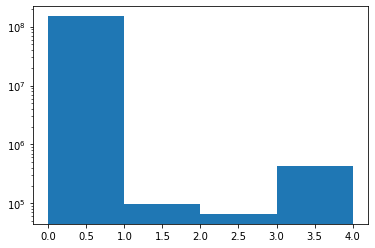

In [43]:
plt.hist(agg_img2.ravel(), bins=4)
plt.yscale('log')

In [44]:
agg_img2 = (agg_img2 >= 3).astype('uint8')

In [46]:
output_path = '../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw/'
output_path = Path(output_path)

In [48]:
unique_cities_map[c]

'38RNV_Samawah'

In [53]:
import rasterio as rio


filepath = output_path / (unique_cities_map[c] + ".tif")
with rio.open(ref_image_fp, 'r') as src:
    profile = src.profile
    profile.update(dtype=rio.uint8, count=1)

    with rio.open(filepath, 'w', **profile) as dst:
        dst.write(agg_img2.astype(rio.uint8), 1)


In [160]:
def aggregate_and_save(folders_to_agg, output_path):
    
    
    
    pass

```
gdal_polygonize.py 38SLF_Mosul.tif -f "ESRI Shapefile" 38SLF_Mosul.shp 38SLF_Mosul id
```

In [8]:

!cd ../output/mlruns/2/15993028224b4b82bf60e6e8a653a9dd/artifacts/raw && for i in "38RNV_Samawah" "38SLD_Tikrit" "38SMB_Bagdad" "38SME_Kirkouk"; do gdal_polygonize.py "$i.tif" -f "ESRI Shapefile" "$i.shp" $i id; done


Creating output 38RNV_Samawah.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output 38SLD_Tikrit.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output 38SMB_Bagdad.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output 38SME_Kirkouk.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:

!for i in "38RNV_Samawah" "38SLD_Tikrit" "38SMB_Bagdad" "38SME_Kirkouk"; do echo "$i.tif"; done



38RNV_Samawah.tif
38SLD_Tikrit.tif
38SMB_Bagdad.tif
38SME_Kirkouk.tif


In [72]:
!export a="abc.tif" && echo $( echo ${a} | tr '.tif' '.shp')

abc.shp
